# Malicious Modeling Visualization and Analysis

### Imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# module setup
plt.rcParams['text.usetex'] = True
# objects definition
latex_label = {
        'tau_block': r'$\tau_{block}$',
        'tau_attestation': r'$\tau_{attestation}$',
        'mainchain_rate': r'$\mu$',
        'branch_ratio': r'$F$',
        'blocktree_entropy': r'$S_{b}$',
        'no_nodes': r'$N$',
        'no_neighs': r'$\langle d \rangle$',
        }
        
        

## Non-Malicious Modeling

### Only TauBlock Analysis

##### Against MainChain Rate

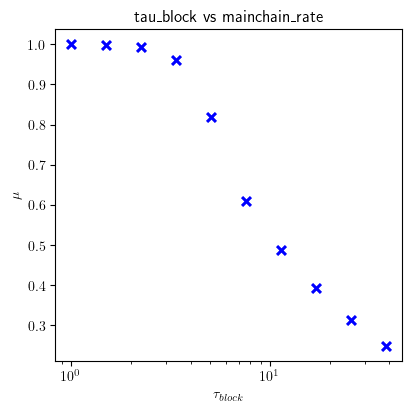

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), constrained_layout=True)

label_var_1 = "tau_block"
plot_var_1 = "mainchain_rate"
x_scale = 'log'

df = pd.read_csv('tests-for-reports/result_in_csv/only_tauBlock.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1]).mean().reset_index(level=-1)
to_plot = df_group

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            marker='x',
            c='b',
            alpha=0.9
            )
    ax.set_xlabel(latex_label[label_var_1])
    ax.set_ylabel(latex_label[plot_var_1])

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

fig.savefig("./tests-for-reports/figures/{}_vs_{}.pdf".format(label_var_1, plot_var_1), dpi=1000)


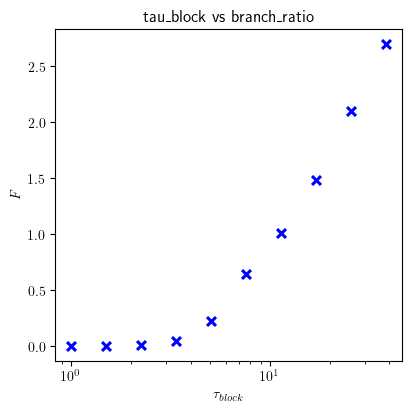

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), constrained_layout=True)

label_var_1 = "tau_block"
plot_var_1 = "branch_ratio"
x_scale = 'log'

df = pd.read_csv('tests-for-reports/result_in_csv/only_tauBlock.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1]).mean().reset_index(level=-1)
to_plot = df_group

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            marker='x',
            c='b',
            alpha=0.9
            )
    ax.set_xlabel(latex_label[label_var_1])
    ax.set_ylabel(latex_label[plot_var_1])

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

fig.savefig("./tests-for-reports/figures/{}_vs_{}.pdf".format(label_var_1, plot_var_1), dpi=1000)

### Only Tau Attestation Analysis

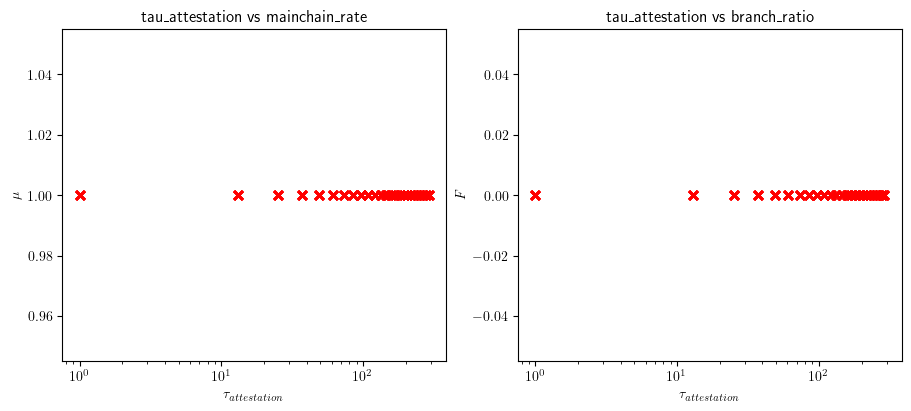

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), constrained_layout=True)


label_var_1 = "tau_attestation"
plot_var_1 = "mainchain_rate"
plot_var_2 = "branch_ratio"
x_scale = 'log'

df = pd.read_csv('tests-for-reports/result_in_csv/only_tauAttestation.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1]).mean().reset_index(level=-1)
to_plot = df_group

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            marker='x',
            c='r',
            alpha=0.9
            )
    ax[0].set_xlabel(latex_label[label_var_1])
    ax[0].set_ylabel(latex_label[plot_var_1])

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)

    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            marker='x',
            c='r',
            alpha=0.9
            )
    ax[1].set_xlabel(latex_label[label_var_1])
    ax[1].set_ylabel(latex_label[plot_var_2])

    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

fig.savefig("./tests-for-reports/figures/{}_vs_{}&{}.pdf".format(label_var_1, plot_var_1, plot_var_2 ))

### TauBlock & Tau Attestation Analysis

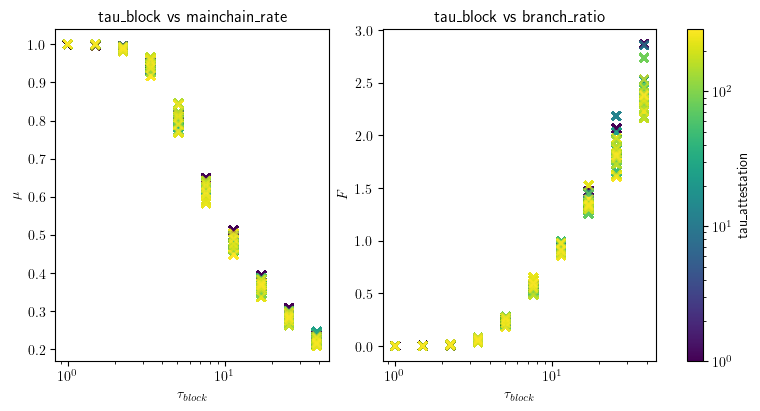

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7.5, 4), constrained_layout=True)

label_var_1 = "tau_block"
label_var_2 = "tau_attestation"
plot_var_1 = "mainchain_rate"
plot_var_2 = "branch_ratio"
x_scale = 'log'

df = pd.read_csv('tests-for-reports/result_in_csv/tauBlock&tauAttestation.csv')
# df['success_percentage'] = df['successful_reorgs']/df['attackable_slots_count']
# df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.LogNorm(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.6
            )
    ax[0].set_xlabel(latex_label[label_var_1])
    ax[0].set_ylabel(latex_label[plot_var_1])

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)

    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.6
            )
    ax[1].set_xlabel(latex_label[label_var_1])
    ax[1].set_ylabel(latex_label[plot_var_2])

    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs_{}.pdf".format(label_var_1,label_var_2,plot_var_1), dpi=1000)


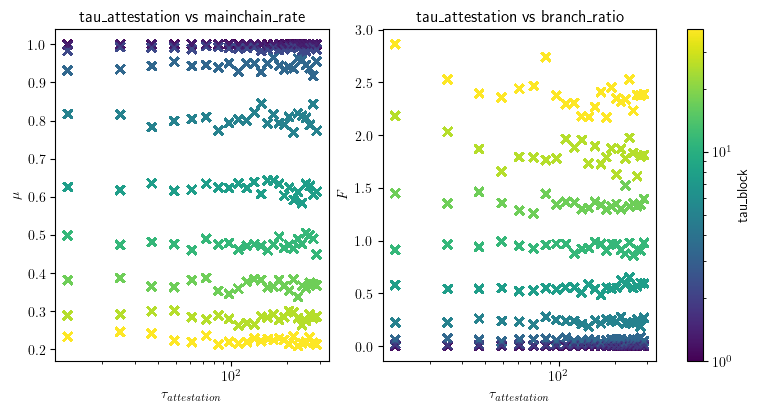

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7.5, 4), constrained_layout=True)

label_var_1 = "tau_attestation"
label_var_2 = "tau_block"
plot_var_1 = "mainchain_rate"
plot_var_2 = "branch_ratio"
x_scale = 'log'


df = pd.read_csv('tests-for-reports/result_in_csv/tauBlock&tauAttestation.csv')
df = df[df.loc[:,"tau_attestation"] != 1]
# df = df[df.loc[:,"tau_attestation"] % 5 == 0]
# df['success_percentage'] = df['successful_reorgs']/df['attackable_slots_count']
# df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)

to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.LogNorm(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.6
            )
    ax[0].set_xlabel(latex_label[label_var_1])
    ax[0].set_ylabel(latex_label[plot_var_1])

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)

    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.6
            )
    ax[1].set_xlabel(latex_label[label_var_1])
    ax[1].set_ylabel(latex_label[plot_var_2])

    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
        
fig.savefig("./tests-for-reports/figures/{}&{}vs_{}.pdf".format(label_var_1,label_var_2,plot_var_1), dpi=1000)      

## Malicious Modeling 

### Proposer Boost Analysis (https://notes.ethereum.org/@casparschwa/H1T0k7b85)

##### Ideal Environment

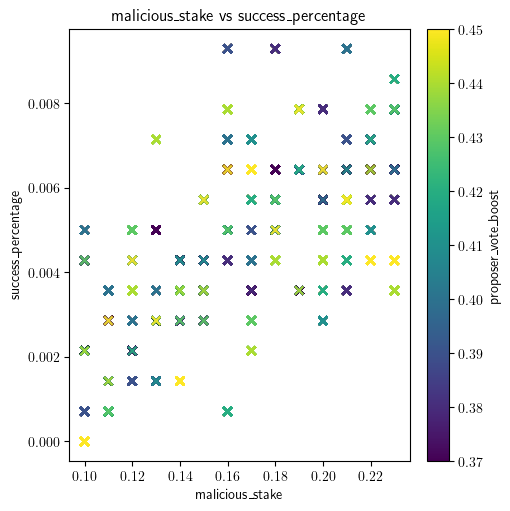

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "success_percentage"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/pb_consideration_reports_ideal.csv')
df[label_var_1] = df[label_var_1].round(decimals=3)
df['success_percentage'] = df['successful_reorgs']/df['total_blocks']
df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/pb_consideration_reports_ideal.pdf", dpi=1000)      

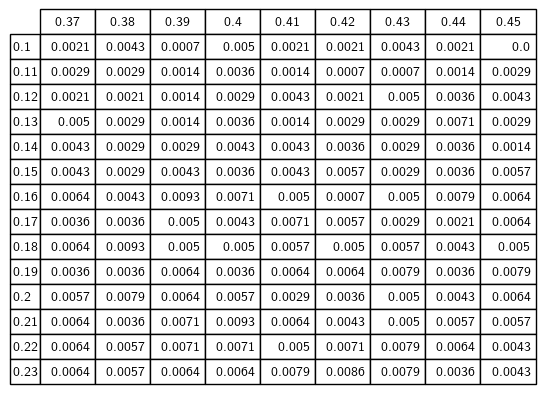

In [43]:
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

rp = np.zeros([len(list(to_plot[label_var_1].unique())), len(list(to_plot[label_var_2].unique()))])
for i_index, i in enumerate(list(to_plot[label_var_1].unique())):
  for j_index, j in enumerate(list(to_plot[label_var_2].unique())):
    rp[i_index][j_index] = np.round(to_plot.loc[to_plot[label_var_1] == i].loc[to_plot[label_var_2] == j][plot_var_1].item(),decimals=4)

df_tabled = pd.DataFrame(rp, columns = [str(i) for i in list(to_plot[label_var_2].unique())], index = [str(i) for i in list(to_plot[label_var_1].unique())])

tb = table(ax, df_tabled, loc = 'center')
tb.scale(1,1.5)
plt.savefig('./tests-for-reports/figures/pb_consideration_reports_ideal_table.pdf')

##### Average Environment

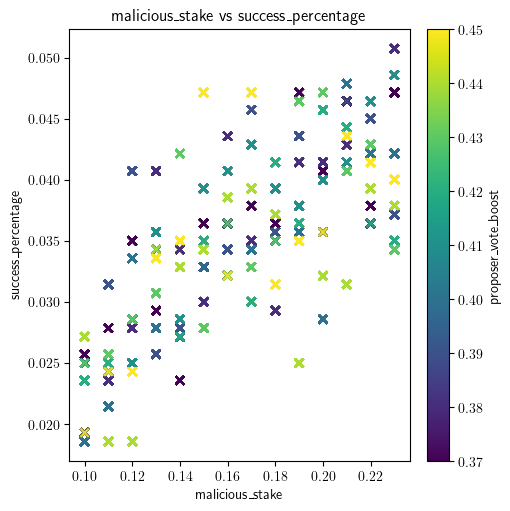

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "success_percentage"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/pb_consideration_reports_average.csv')
df[label_var_1] = df[label_var_1].round(decimals=3)
df['success_percentage'] = df['successful_reorgs']/df['total_blocks']
df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
        
fig.savefig("./tests-for-reports/figures/pb_consideration_reports_average.pdf", dpi=1000)      

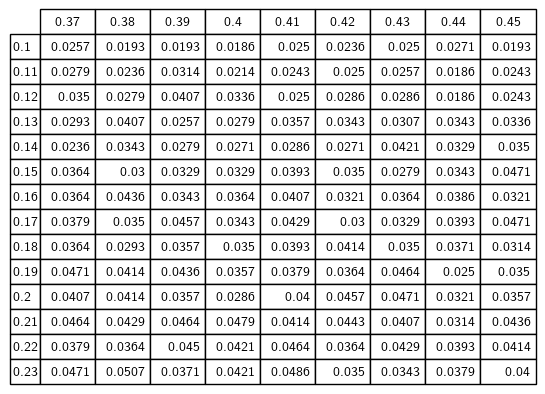

In [45]:
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis


rp = np.zeros([len(list(to_plot[label_var_1].unique())), len(list(to_plot[label_var_2].unique()))])
for i_index, i in enumerate(list(to_plot[label_var_1].unique())):
  for j_index, j in enumerate(list(to_plot[label_var_2].unique())):
    rp[i_index][j_index] = np.round(to_plot.loc[to_plot[label_var_1] == i].loc[to_plot[label_var_2] == j][plot_var_1].item(),decimals=4)

df_tabled = pd.DataFrame(rp, columns = [str(i) for i in list(to_plot[label_var_2].unique())], index = [str(i) for i in list(to_plot[label_var_1].unique())])

tb = table(ax, df_tabled, loc = 'center')
tb.scale(1,1.5)
plt.savefig('./tests-for-reports/figures/pb_consideration_reports_average_table.pdf')

##### Worst Environment

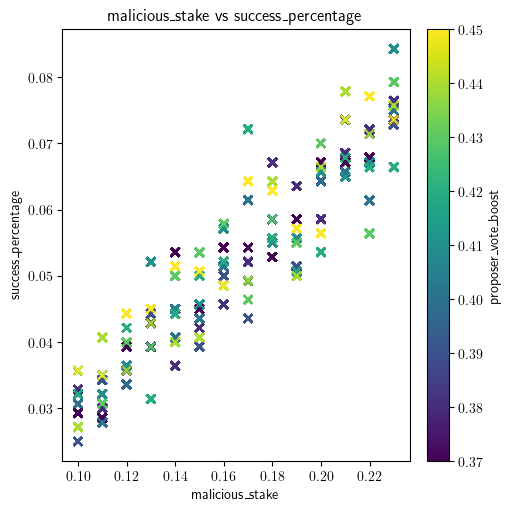

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "success_percentage"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/pb_consideration_reports_worst.csv')
df[label_var_1] = df[label_var_1].round(decimals=3)
df['success_percentage'] = df['successful_reorgs']/df['total_blocks']
df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/pb_consideration_reports_worst.pdf", dpi=1000)      

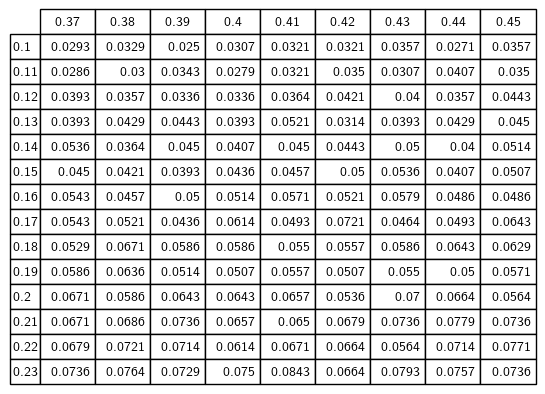

In [76]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

rp = np.zeros([len(list(to_plot[label_var_1].unique())), len(list(to_plot[label_var_2].unique()))])
for i_index, i in enumerate(list(to_plot[label_var_1].unique())):
  for j_index, j in enumerate(list(to_plot[label_var_2].unique())):
    rp[i_index][j_index] = np.round(to_plot.loc[to_plot[label_var_1] == i].loc[to_plot[label_var_2] == j][plot_var_1].item(),decimals=4)

df_tabled = pd.DataFrame(rp, columns = [str(i) for i in list(to_plot[label_var_2].unique())], index = [str(i) for i in list(to_plot[label_var_1].unique())])
tb = table(ax, df_tabled, loc = 'center')
tb.scale(1,1.5)
plt.savefig('./tests-for-reports/figures/pb_consideration_reports_worst_table.pdf')

### Malicious Stake vs Adversary Offset

#### Average Environment

##### For attackable slots

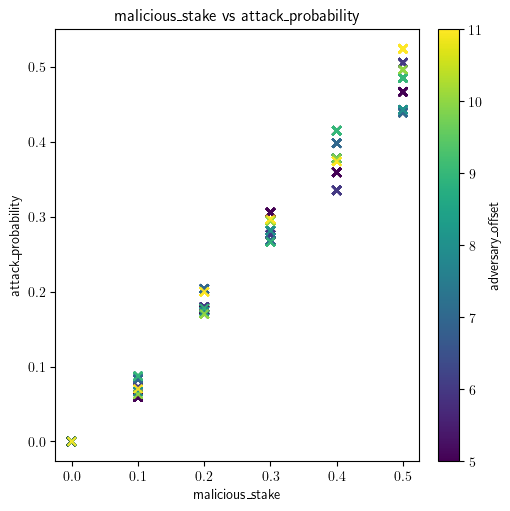

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "attack_probability"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_average.csv')
df['attack_probability'] = df['attackable_slots_count']/df['total_blocks']
df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Malicious Blocks Finality Percentage

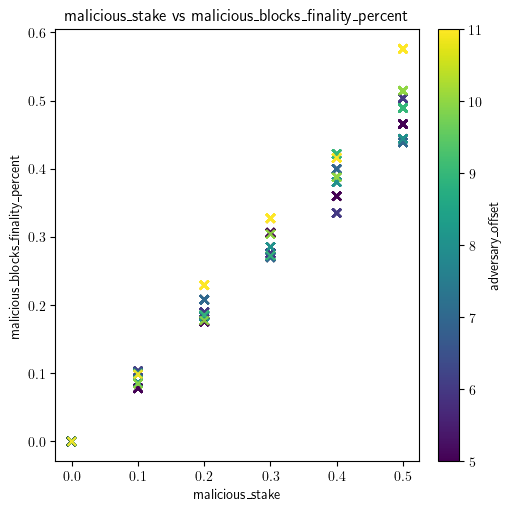

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "malicious_blocks_finality_percent"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Successful reorgs 

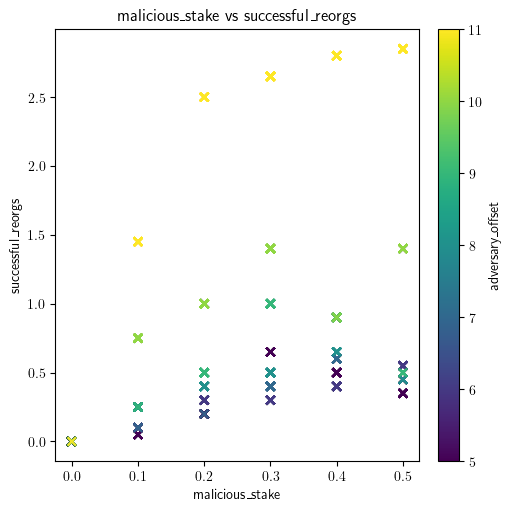

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "successful_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

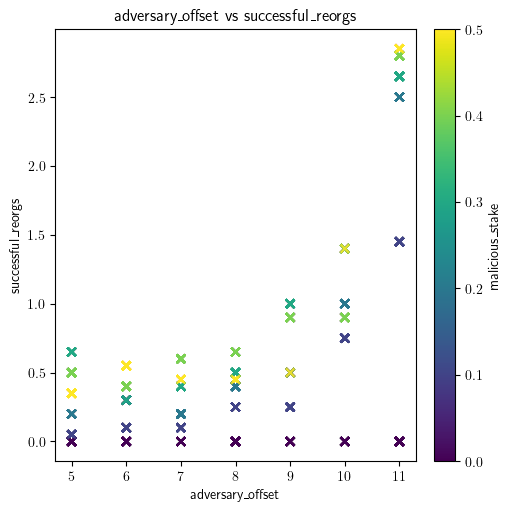

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "malicious_stake" 
plot_var_1 = "successful_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Blocks protected from reorgs

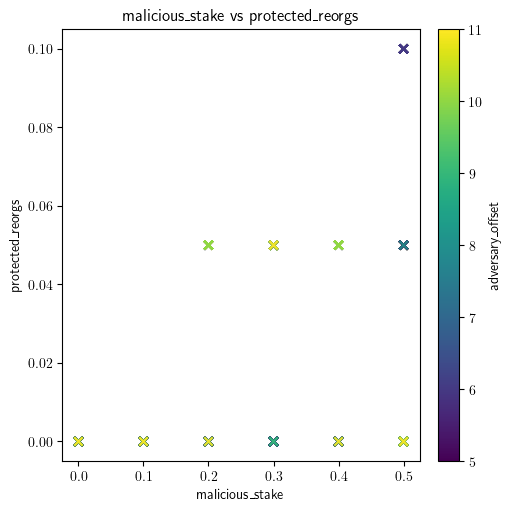

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

#### Ideal Environment

##### For attackable slots

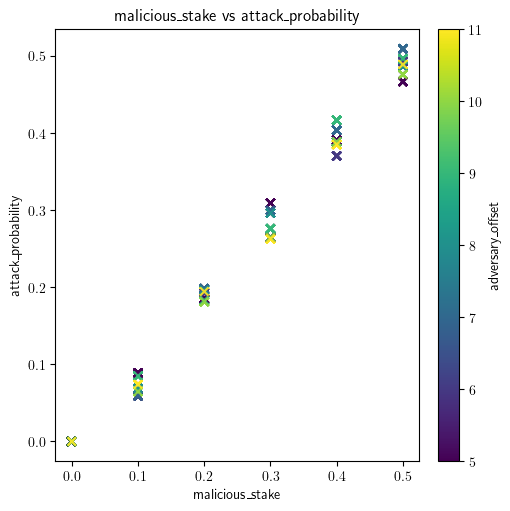

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "attack_probability"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_ideal.csv')
df['attack_probability'] = df['attackable_slots_count']/df['total_blocks']
df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Malicious Blocks Finality Percentage

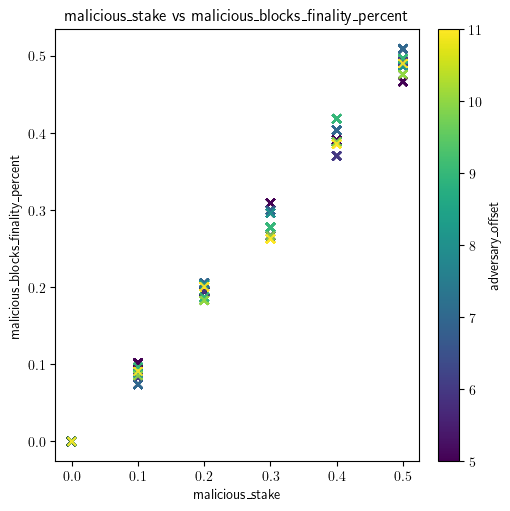

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "malicious_blocks_finality_percent"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Successful reorgs 

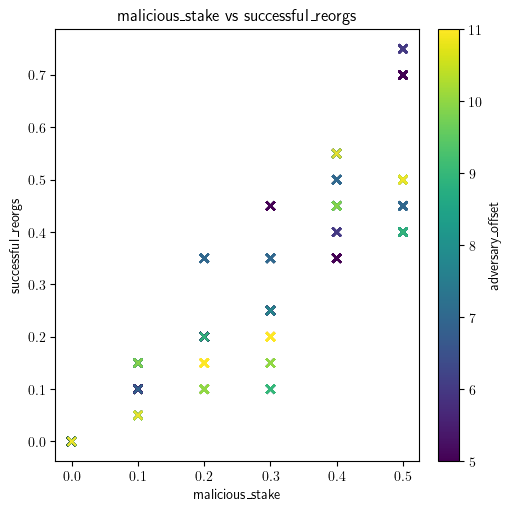

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "successful_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

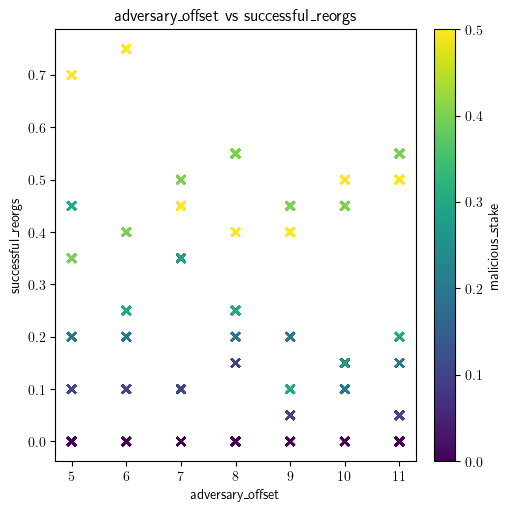

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "malicious_stake" 
plot_var_1 = "successful_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Blocks protected from reorgs

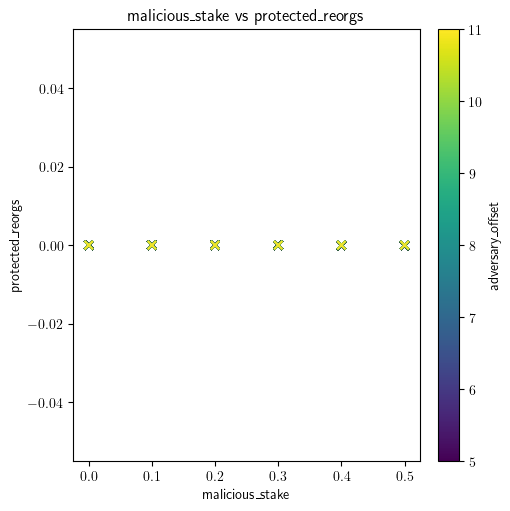

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

#### Worst Environment

##### For attackable slots

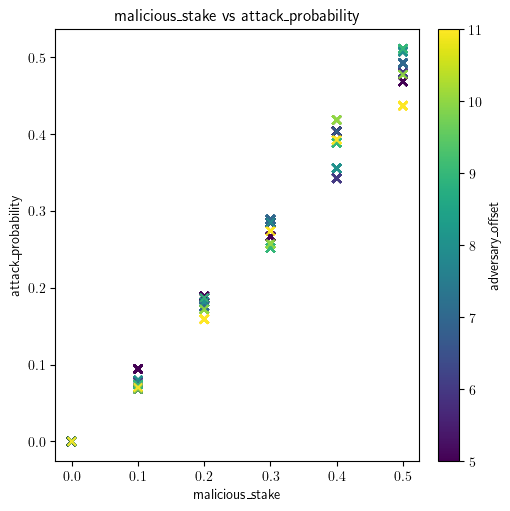

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake" 
label_var_2 = "adversary_offset"
plot_var_1 = "attack_probability"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_worst.csv')
df['attack_probability'] = df['attackable_slots_count']/df['total_blocks']
df.fillna(0)
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Malicious Blocks Finality Percentage

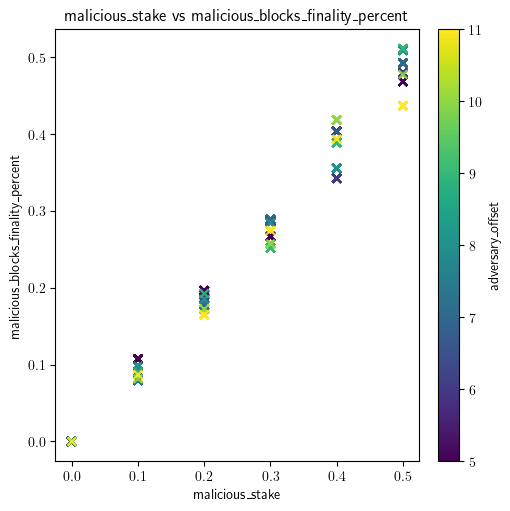

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake" 
label_var_2 = "adversary_offset"
plot_var_1 = "malicious_blocks_finality_percent"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Successful reorgs 

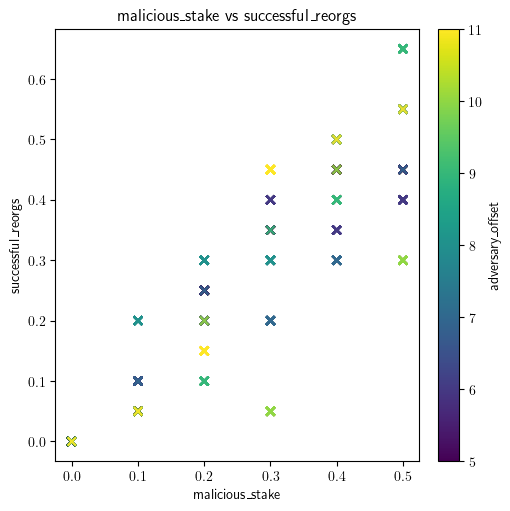

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 =  "malicious_stake" 
label_var_2 = "adversary_offset"
plot_var_1 = "successful_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

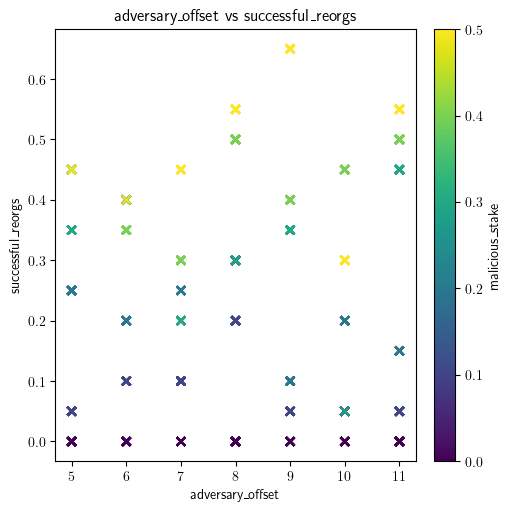

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "malicious_stake" 
plot_var_1 = "successful_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

##### For Blocks protected from reorgs

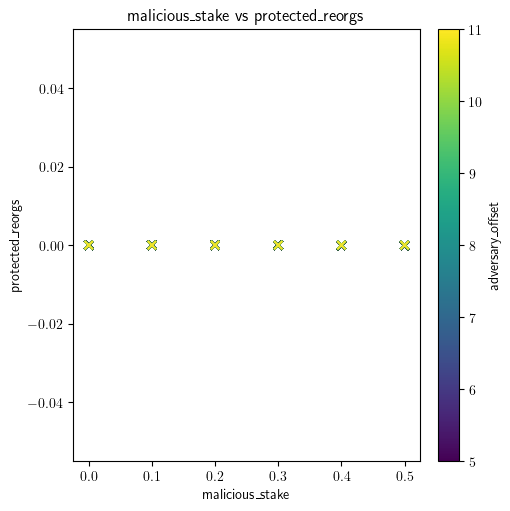

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "adversary_offset"
plot_var_1 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/AOvsMS_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax.scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax.set_xlabel(label_var_1)
    ax.set_ylabel(plot_var_1)

    ax.set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax.set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)      

### Adversary Offset vs Proposer Vote Boost

#### High Malicious Stake

##### Worst Environment

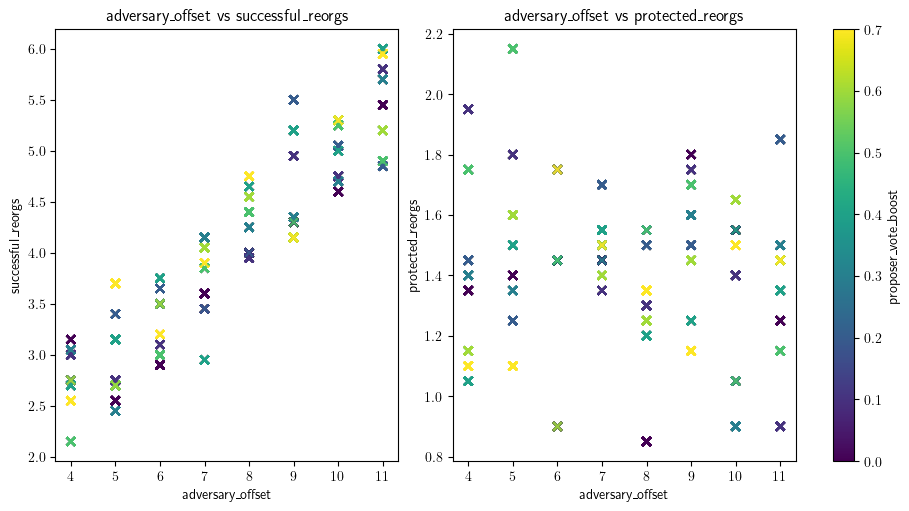

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&AO_w_HBMS_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst_HBMS.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Ideal Environment

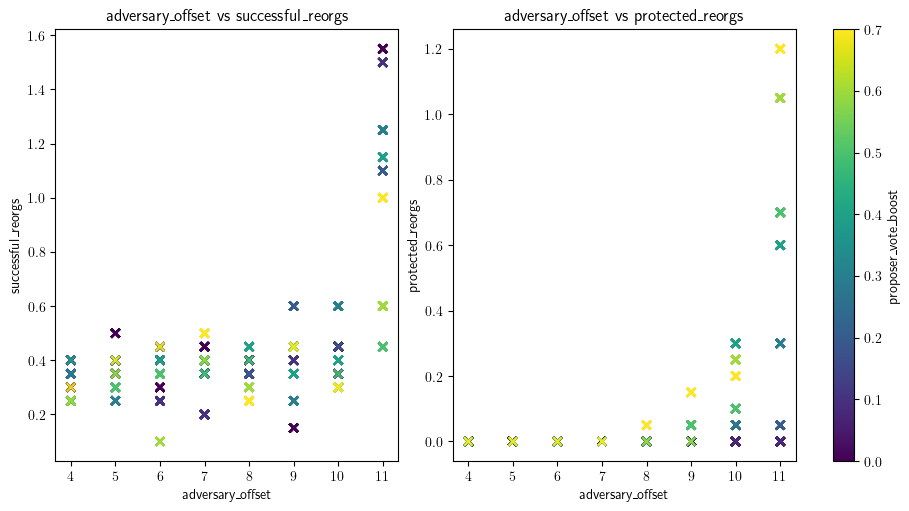

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&AO_w_HBMS_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal_HBMS.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Average Environment

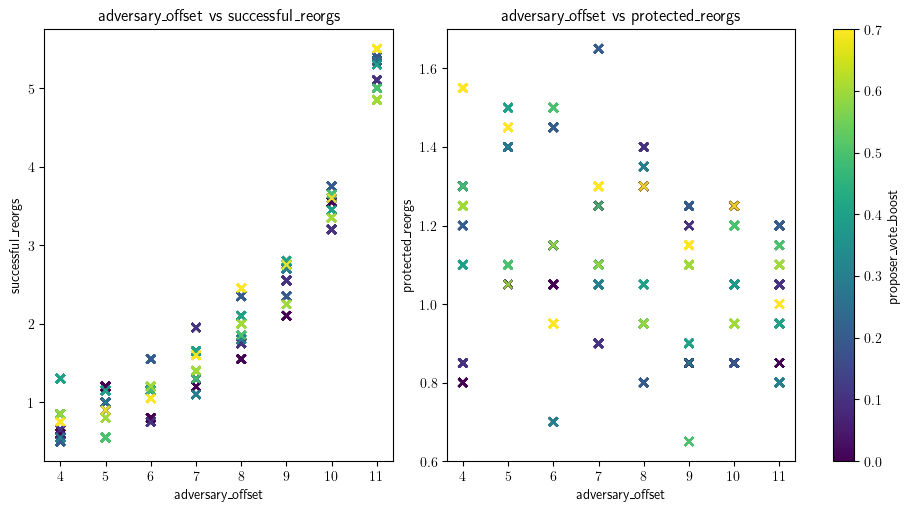

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&AO_w_HBMS_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average_HBMS.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

#### Lower Malicious Stake

##### Worst Environment

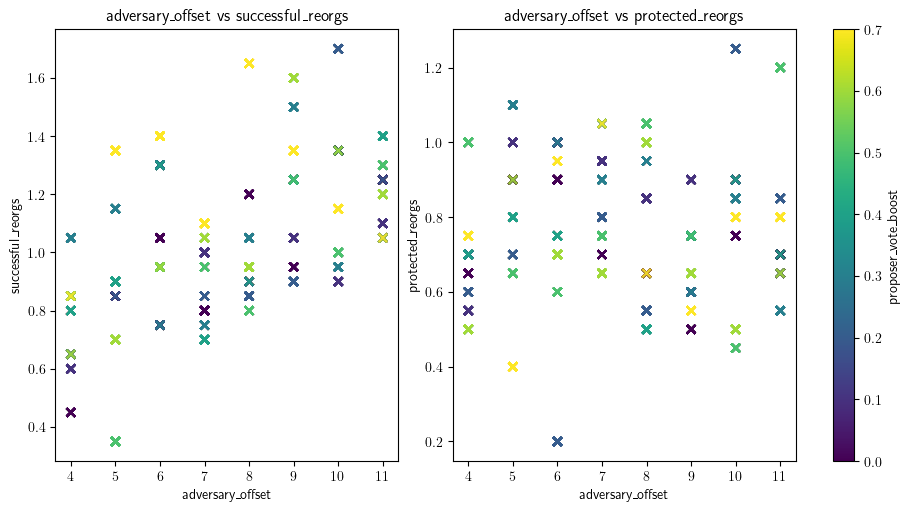

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&AO_w_LBMS_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_worst_LBMS.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Ideal Environment

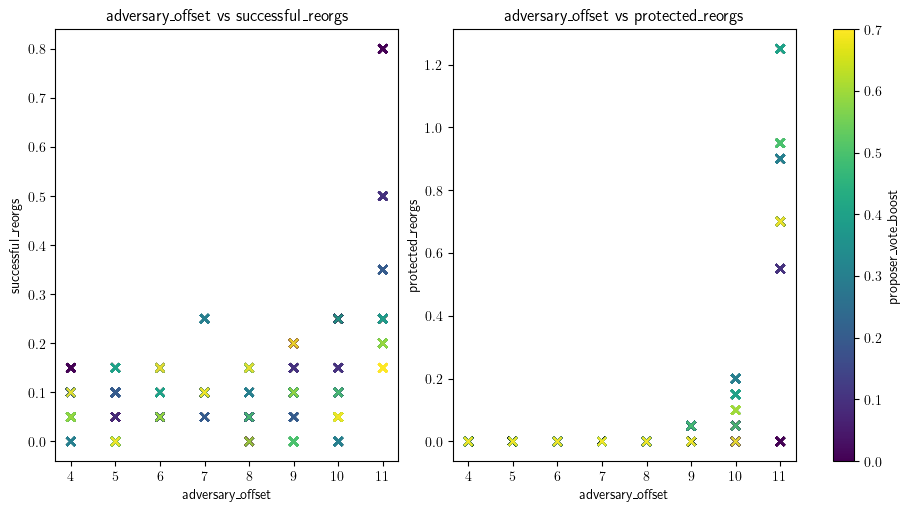

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&AO_w_LBMS_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_ideal_LBMS.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Average Environment

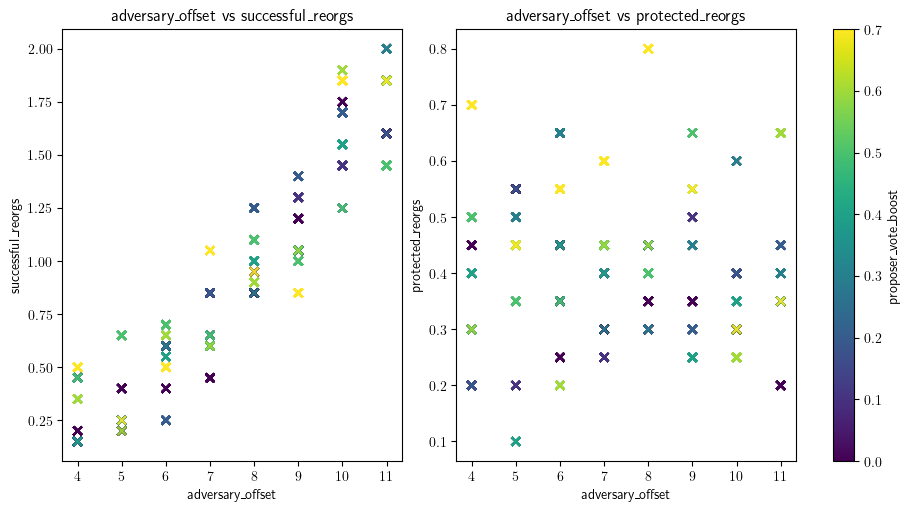

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "adversary_offset"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&AO_w_LBMS_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )

fig.savefig("./tests-for-reports/figures/{}&{}vs{}_average_LBMS.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

### Malicious Stake vs Proposer Vote Boost

#### Higher Adversary Offset

##### Worst Environment

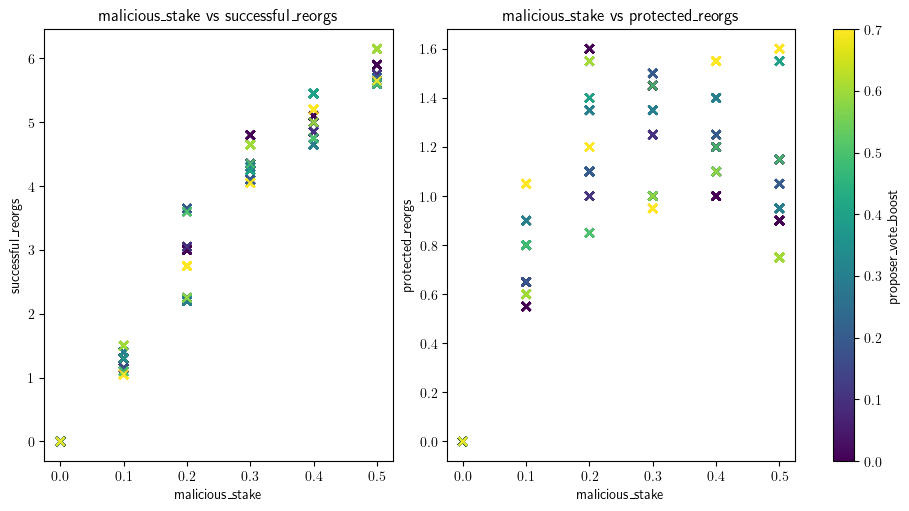

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&MS_w_HBAO_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
fig.savefig("./tests-for-reports/figures/{}&{}vs{}_HBAO_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Ideal Environment

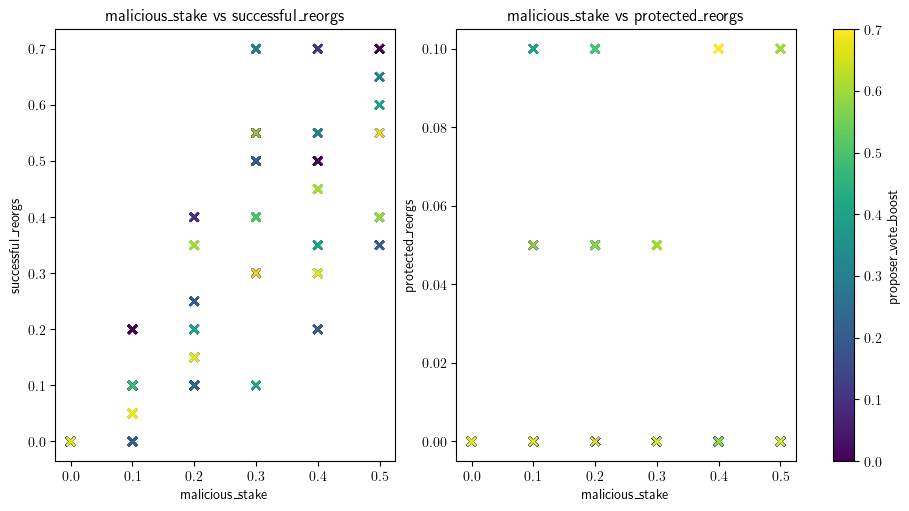

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&MS_w_HBAO_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
fig.savefig("./tests-for-reports/figures/{}&{}vs{}_HBAO_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Average Environment

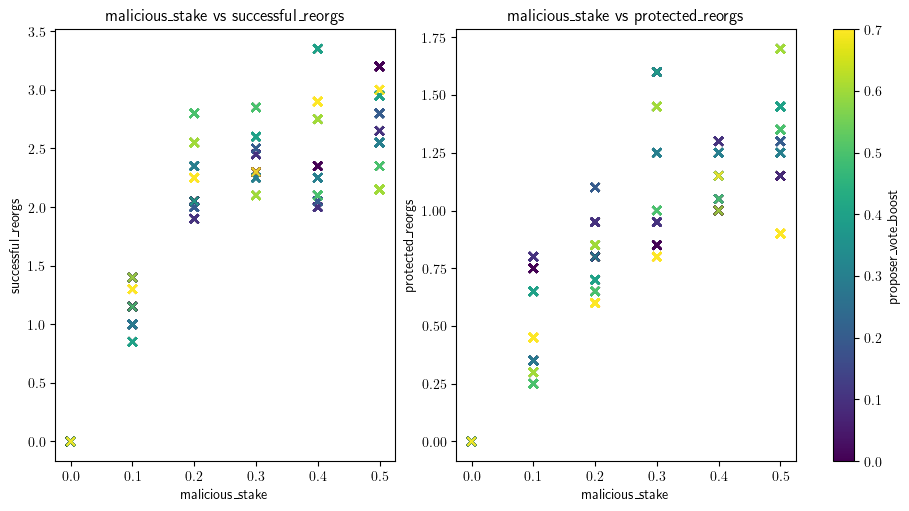

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&MS_w_HBAO_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
fig.savefig("./tests-for-reports/figures/{}&{}vs{}_HBAO_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

#### Lower Adversary Offset

##### Worst Environment

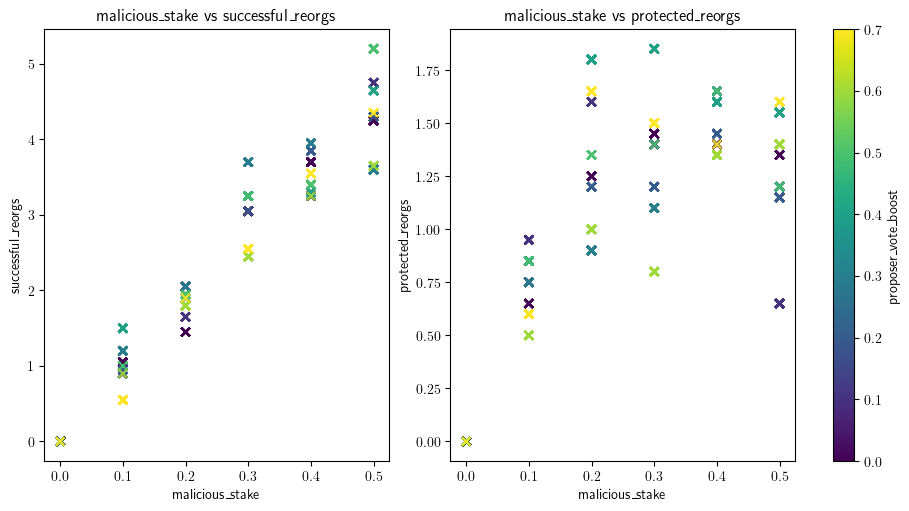

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&MS_w_LBAO_worst.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
fig.savefig("./tests-for-reports/figures/{}&{}vs{}_LBAO_worst.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Ideal Environment

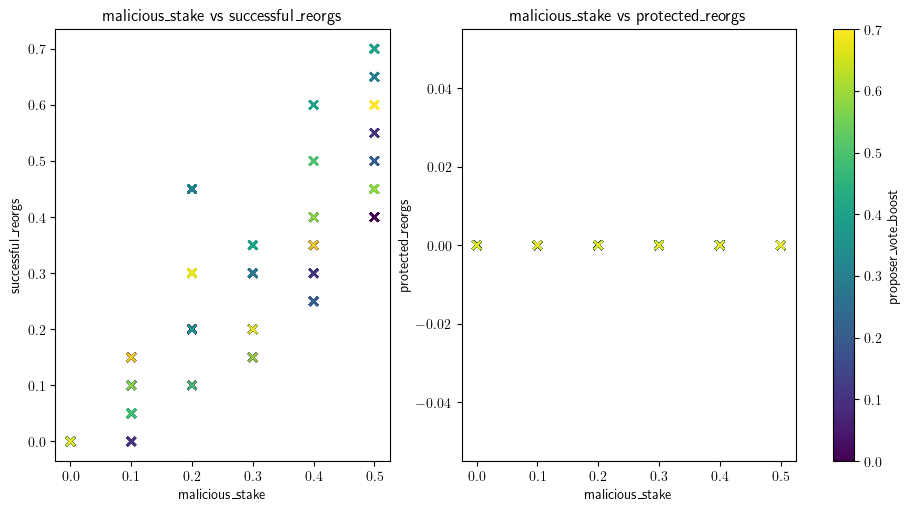

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&MS_w_LBAO_ideal.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
fig.savefig("./tests-for-reports/figures/{}&{}vs{}_LBAO_ideal.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  

##### Average Environment

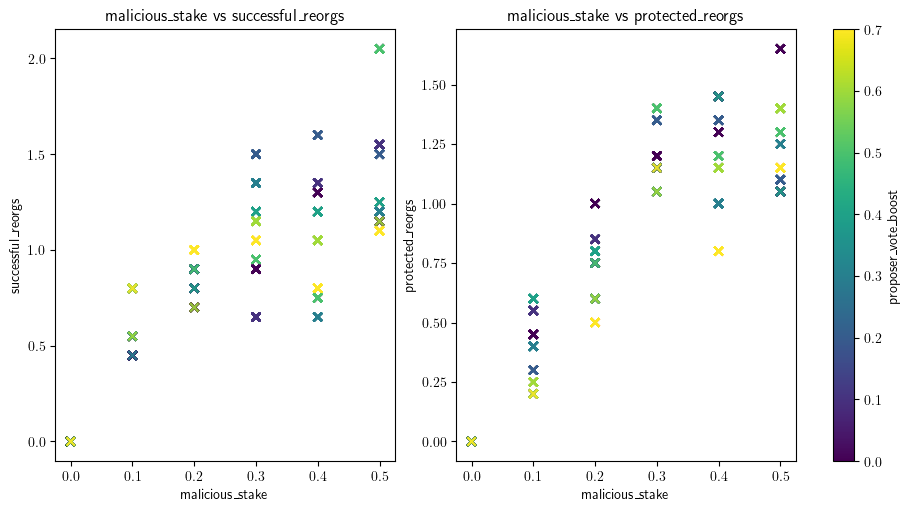

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

label_var_1 = "malicious_stake"
label_var_2 = "proposer_vote_boost"
plot_var_1 = "successful_reorgs"
plot_var_2 = "protected_reorgs"
x_scale = 'linear'

df = pd.read_csv('tests-for-reports/result_in_csv/tB&MS_w_LBAO_average.csv')
df = df.iloc[:, 2: ]


df_group = df.groupby([label_var_1, label_var_2]).mean().reset_index(level=-1).reset_index(level=-1)
to_plot = df_group
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min(list(df[label_var_2].values)),vmax=max(list(df[label_var_2].values)))
color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i in to_plot.index:
    ax[0].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_1],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[0].set_xlabel(label_var_1)
    ax[0].set_ylabel(plot_var_1)

    ax[0].set_title("{} vs {}".format(label_var_1, plot_var_1))
    ax[0].set_xscale(x_scale)
    
    ax[1].scatter(
            to_plot[label_var_1],
            to_plot[plot_var_2],
            c=color_map.to_rgba(to_plot[label_var_2]),
            marker='x',
            alpha=0.9
            )
    ax[1].set_xlabel(label_var_1)
    ax[1].set_ylabel(plot_var_2)
    ax[1].set_title("{} vs {}".format(label_var_1, plot_var_2))
    ax[1].set_xscale(x_scale)

cbar = fig.colorbar(
        color_map,
        ax=ax,
        label=label_var_2,
        spacing="proportional"
        )
fig.savefig("./tests-for-reports/figures/{}&{}vs{}_LBAO_average.pdf".format(label_var_1, label_var_2, plot_var_1), dpi=1000)  